In [1]:
import altair as alt
import pandas as pd
import janitor

from vega_datasets import data

File contains best practice code for all stages of data science workflow

# Collecting and cleaning

In [2]:
filename = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-04-23/raw_anime.csv'
df = pd.read_csv(filename)

In [3]:
df.head()

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],...,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],...,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],...,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


### List available dataset

In [34]:
data.list_datasets()[:10]

['7zip',
 'airports',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate']

In [35]:
data.airports.description

'This dataset lists US airports, including airport code, city, state, latitude, and longitude. This dataset is a subset of the data compiled and published at http://ourairports.com/data/, and is in the public domain.'

# Exploration

## Numerical

## Graphical

# Iris

In [36]:
iris = data.iris()
iris.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

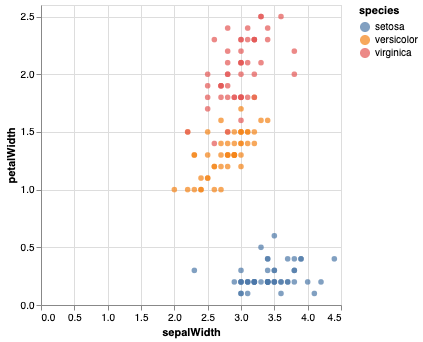

In [56]:
alt.Chart(iris).mark_circle().encode(
    x='sepalWidth', 
    y='petalWidth',
    color='species', 
).properties(
    width=300, 
    height=300
)

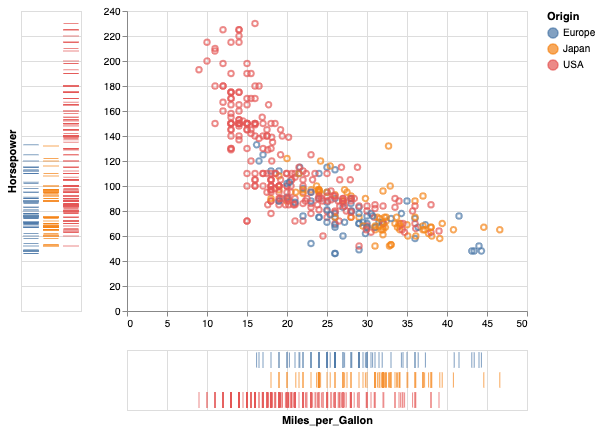

In [57]:
import altair as alt
from vega_datasets import data

source = data.cars()

# Configure the options common to all layers
brush = alt.selection(type='interval')
base = alt.Chart(source).add_selection(brush)

# Configure the points
points = base.mark_point().encode(
    x=alt.X('Miles_per_Gallon', title=''),
    y=alt.Y('Horsepower', title=''),
    color=alt.condition(brush, 'Origin', alt.value('grey'))
)

# Configure the ticks
tick_axis = alt.Axis(labels=False, domain=False, ticks=False)

x_ticks = base.mark_tick().encode(
    alt.X('Miles_per_Gallon', axis=tick_axis),
    alt.Y('Origin', title='', axis=tick_axis),
    color=alt.condition(brush, 'Origin', alt.value('lightgrey'))
)

y_ticks = base.mark_tick().encode(
    alt.X('Origin', title='', axis=tick_axis),
    alt.Y('Horsepower', axis=tick_axis),
    color=alt.condition(brush, 'Origin', alt.value('lightgrey'))
)

# Build the chart
y_ticks | (points & x_ticks)

In [ ]:

iris = data.iris()

chart = alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='sepalWidth',
    color='species'
)

chart | chart.encode(x='sepalLength') | chart.encode(y='petalWidth')